In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [14]:
np.random.seed(42)
random.seed(42)

In [15]:
n_samples = 1000

In [16]:
x0 = np.random.normal(loc=-2.0, scale=1.0, size=(n_samples//2, 2))
x1 = np.random.normal(loc=2.0, scale=1.0, size=(n_samples//2, 2))

In [17]:
X = np.vstack((x0, x1))
y = np.array([0]*(n_samples//2) + [1]*(n_samples//2))

In [18]:
df = pd.DataFrame(X, columns=['feature_0', 'feature_1'])
df['target'] = y

In [19]:
df.head()

,feature_0,feature_1,target
0,-1.503286,-2.138264,0
1,-1.352311,-0.476970,0
2,-2.234153,-2.234137,0
3,-0.420787,-1.232565,0
4,-2.469474,-1.457440,0


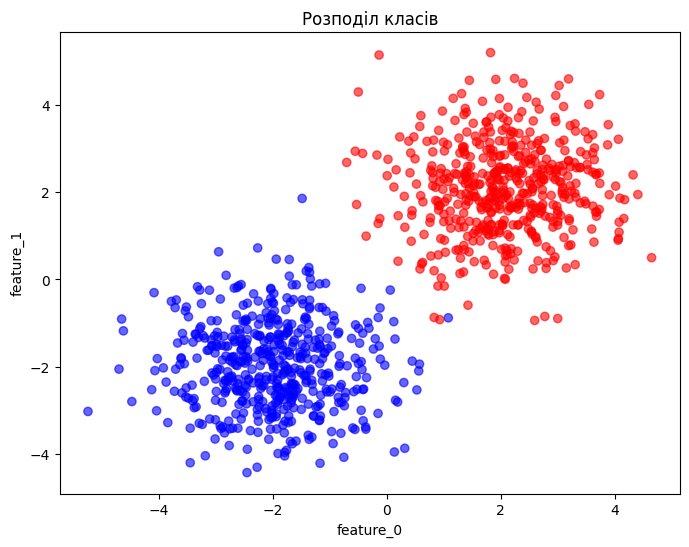

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['feature_0'], df['feature_1'], c=df['target'], cmap='bwr', alpha=0.6)
plt.xlabel("feature_0")
plt.ylabel("feature_1")
plt.title("Розподіл класів")
plt.show()

In [21]:
X = df[['feature_0', 'feature_1']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [23]:
model = LogisticRegression()
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



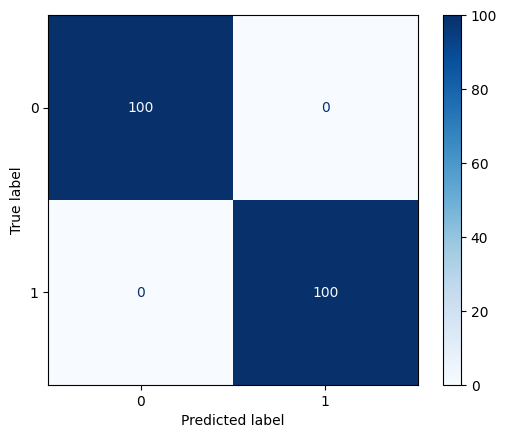

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [28]:
xx, yy = np.meshgrid(
    np.linspace(X['feature_0'].min()-1, X['feature_0'].max()+1, 200),
    np.linspace(X['feature_1'].min()-1, X['feature_1'].max()+1, 200)
)

c:\Users\Dmytro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


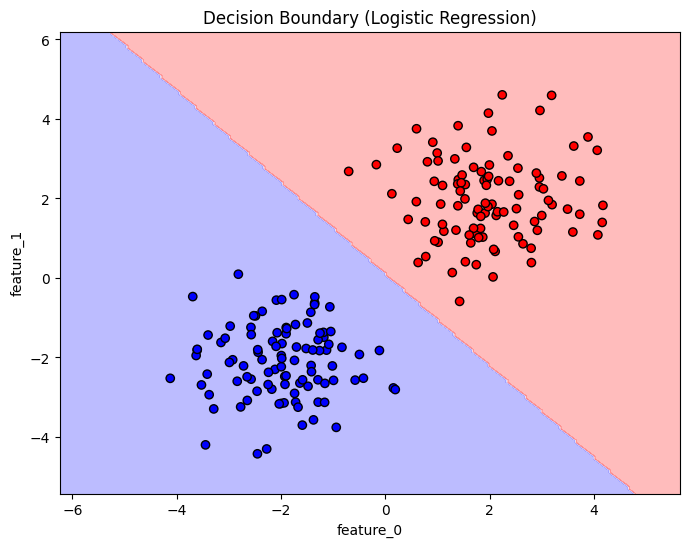

In [29]:

grid = np.c_[xx.ravel(), yy.ravel()]
grid_s = scaler.transform(grid)
Z = model.predict(grid_s)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
plt.scatter(X_test['feature_0'], X_test['feature_1'], c=y_test, cmap="bwr", edgecolor='k')
plt.title("Decision Boundary (Logistic Regression)")
plt.xlabel("feature_0")
plt.ylabel("feature_1")
plt.show()